<a href="https://colab.research.google.com/github/kordalesummers/module2_lectures/blob/master/1_7_introduction_to_regular_expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regular Expressions

<img src="https://imgs.xkcd.com/comics/regular_expressions.png " width=400>

## RegEx Golf

<img src="https://imgs.xkcd.com/comics/regex_golf.png" width=600>

## Perl Problems

    Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems. - Jamie Zawinski 
<img src="https://imgs.xkcd.com/comics/perl_problems.png" width=600>

## <font color="red"> Exercise 1 </font>

**Question:** What do all of these strings have in common?

* `"ab"`
* `"abab"`
* `"ababcde"`
* `"abcde"`

> Your answer here

## <font color="red"> Exercise 2 </font>

**Task:** Predict the next three elements of the sequence.

* `"0"`
* `"1ab"`
* `"2abab"`
* `"3ababab"`


> Your answer here

## What is a regular expression

* Language for matching regular patterns
    * `"ab"`
    * `"abab"`
    * `"ababcde"`
    * `"abcde"`
* Can't match other, context sensitive, patterns
    * `"0"`
    * `"1ab"`
    * `"2abab"`
    * `"3ababab"`

## <font color="red"> Exercise 3 </font>

**Tasks:** 

1. Go to [RegexOne](https://regexone.com/)
2. Read the first section
3. Define a pattern that matches the first three strings.

In [3]:
pattern1 = "abc"

## Regular Expressions Workflow in Python

* `import re`
* Compile a pattern `regex = re.compile(pattern)`
    * Use `r"pattern"` to avoid escaping symbols
* `m = regex.match(some_string)`

In [6]:
import re

In [ ]:
pattern = r"ab" # r is for raw
regex = re.compile(pattern)
m1 = regex.match('abc')
m1

<re.Match object; span=(0, 2), match='ab'>

## `match` returns `None` when there is no match

In [ ]:
m2 = regex.match('acb')
m2

In [ ]:
m2 is None

True

In [ ]:
not m2 

True

## The result of a match can be used in Boolean expressions

In [ ]:
"Yes" if m1 else "No"

'Yes'

In [ ]:
"Yes" if m2 else "No"

'No'

## <font color="red"> Exercise 4 </font>

**Tasks:** Make sure your pattern from <font color="red"> Exercise 3</font> passes the following `assert` statements.

In [8]:
pattern1 = "abc"
my_regex = re.compile(pattern1)
assert my_regex.match('abcdefg')
assert my_regex.match('abcde')
assert my_regex.match('abc')
assert not my_regex.match('acb')

## Whitespace and escaped characters

* Whitespace includes spaces, tabs, and newlines
* Python uses escape characters: `"\t"`, `"\n"`

#### Use `"\n"` for newlines

In [ ]:
"\n"

'\n'

In [ ]:
print('\n')

In [ ]:
print('a\nb')

a
b


#### Use `"\t"` for tab

In [ ]:
"\t"

'\t'

In [ ]:
print('\t')

In [ ]:
print('a\tb')

a	b


## Why use `r"raw strings"` in `regex`

* Regular strings $\rightarrow$ `\` is for special characters: `'\n'`, `'\t'`
* In regular expressions, `\` is for
    * Escaping: i.e. `\.` vs. `.`
* Without raw string, we would need 
    * `'\\n'`  to match a new line
    * `'\\t'` to match a tab

In [ ]:
r"\n" # Raw string allow us to match newlines without the extra \

'\\n'

## Important `match object` methods

<table class="docutils" border="1">
<colgroup>
<col width="29%">
<col width="71%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method/Attribute</th>
<th class="head">Purpose</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><code class="docutils literal notranslate"><span class="pre">group()</span></code></td>
<td>Return the string matched by the RE</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal notranslate"><span class="pre">start()</span></code></td>
<td>Return the starting position of the match</td>
</tr>
<tr class="row-even"><td><code class="docutils literal notranslate"><span class="pre">end()</span></code></td>
<td>Return the ending position of the match</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal notranslate"><span class="pre">span()</span></code></td>
<td>Return a tuple containing the (start, end)
positions  of the match</td>
</tr>
</tbody>
</table>

In [ ]:
m1.group()

'ab'

In [ ]:
m1.start(), m.end()

(0, 2)

In [ ]:
m1.span()

(0, 2)

## Be sure to check for `None`

In [ ]:
m2 # example that DIDN'T match 

In [ ]:
m2 is None # non-matches return None

True

In [ ]:
m2.group() # Oh you silly 'Nonetype' errors

AttributeError: 'NoneType' object has no attribute 'group'

## Solution 1

Always check for `None`

In [ ]:
m2.group() if m2 else None

## Solution 2

Learn about the [`Maybe` monad](https://en.wikipedia.org/wiki/Monad_(functional_programming)#An_example:_Maybe). (We will tackle this in a later chapter.)

## Python regex methods

<table class="docutils" border="1">
<colgroup>
<col width="28%">
<col width="72%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method/Attribute</th>
<th class="head">Purpose</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><code class="docutils literal notranslate"><span class="pre">match()</span></code></td>
<td>Determine if the RE matches at the beginning
of the string.</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal notranslate"><span class="pre">search()</span></code></td>
<td>Scan through a string, looking for any
location where this RE matches.</td>
</tr>
<tr class="row-even"><td><code class="docutils literal notranslate"><span class="pre">findall()</span></code></td>
<td>Find all substrings where the RE matches, and
returns them as a list.</td>
</tr>
<tr class="row-odd"><td><code class="docutils literal notranslate"><span class="pre">finditer()</span></code></td>
<td>Find all substrings where the RE matches, and
returns them as an <a class="reference internal" href="../glossary.html#term-iterator"><span class="xref std std-term">iterator</span></a>.</td>
</tr>
</tbody>
</table>

**Source:** [Python documentation](https://docs.python.org/3/howto/regex.html)

## A better `str.replace`

* Often chain many `replace` calls
* Example `s.replace('(', '').replace(')','').replace(':', '')`
* We can use `re.sub` to simplify.

In [30]:
s = "The string (has) some: things in (it)."
s.replace('(', '').replace(')','').replace(':', '')

'The string has some things in it.'

In [31]:
re.sub(r"[():]", '', s)

'The string has some things in it.'

## Substitutions with a compiled RegEx

1. Compile a pattern
2. Use `pat.sub(new_substr, s)`

In [ ]:
paren_or_colon = re.compile(r"[():]")
paren_or_colon.sub('', s)

'The string has some things in it'

## <font color="red"> Exercise 4 </font>

**Task:** Write and test a function that uses `re.sub` to remove all punctuation from a string.  **Hint:** Use the `punctuation` variable from the `string` module.

In [34]:
t = "Testing this sentence."
re.sub(r"[.:]", '', t)

'Testing this sentence'

## Next Up

Now you should read through the rest of [RegExOne](https://regexone.com/) and put your work in [Lab 3](./lab_3_regexone.ipynb).

In [10]:
123

123

In [13]:
\.

SyntaxError: ignored

In [14]:
[cmf]

NameError: ignored

In [15]:
[^b]og

SyntaxError: ignored

In [16]:
[A-C]

NameError: ignored

In [17]:
z{3,5}

SyntaxError: ignored

In [18]:
a+[bc]

NameError: ignored

In [19]:
\d+ files? found?

Object `found` not found.


In [20]:
\s+

SyntaxError: ignored

In [21]:
^Mission

SyntaxError: ignored

In [22]:
^(file.+)\.pdf$

SyntaxError: ignored

In [23]:
(\w+ (\d+))

SyntaxError: ignored

In [24]:
(\d{4})x(\d+)

SyntaxError: ignored

In [25]:
(cats|dogs)

NameError: ignored

In [26]:
\b

SyntaxError: ignored

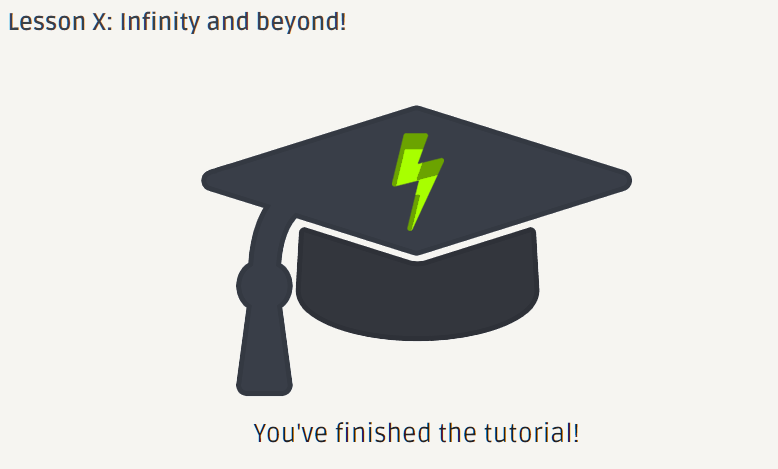